# [spaCy](http://spacy.io/docs/#examples) 介绍

In [1]:
# 导入工具包和英文模型
# python -m spacy download en 用管理员身份打开CMD

import spacy
nlp = spacy.load('en')

### 文本处理

In [2]:
doc = nlp('Weather is good, very windy and sunny. We have no classes in the afternoon.')

In [3]:
# 分词
for token in doc:
    print (token)

Weather
is
good
,
very
windy
and
sunny
.
We
have
no
classes
in
the
afternoon
.


In [4]:
#分句
for sent in doc.sents:
    print (sent)

Weather is good, very windy and sunny.
We have no classes in the afternoon.


### 词性

[参考链接](http://www.winwaed.com/blog/2011/11/08/part-of-speech-tags/).

In [5]:
for token in doc:
    print ('{}-{}'.format(token,token.pos_))

Weather-PROPN
is-VERB
good-ADJ
,-PUNCT
very-ADV
windy-ADJ
and-CCONJ
sunny-ADJ
.-PUNCT
We-PRON
have-VERB
no-DET
classes-NOUN
in-ADP
the-DET
afternoon-NOUN
.-PUNCT


## 命名体识别

In [6]:
doc_2 = nlp("I went to Paris where I met my old friend Jack from uni.")
for ent in doc_2.ents:
    print ('{}-{}'.format(ent,ent.label_))

Paris-GPE
Jack-PERSON


In [7]:
from spacy import displacy
 
doc = nlp('I went to Paris where I met my old friend Jack from uni.')
displacy.render(doc,style='ent',jupyter=True)

### 找到书中所有人物名字

In [9]:
def read_file(file_name):
    with open(file_name, 'r') as file:
        return file.read()

In [10]:
# 加载文本数据
text = read_file('./data/pride_and_prejudice.txt')
processed_text = nlp(text)

In [11]:
sentences = [s for s in processed_text.sents]
print (len(sentences))

6469


In [12]:
sentences[:5]

[The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen
 , This eBook is for the use of anyone anywhere at no cost and with
 almost no restrictions whatsoever.  , You may copy it, give it away or
 re-use it under the terms of the Project Gutenberg License included
 with this eBook or online at www.gutenberg.org
 
 
 Title: Pride and Prejudice
 
 Author: Jane Austen
 , Posting Date: August 26, 2008 [EBook #1342]
 Release Date: June, 1998, Last updated:]

In [23]:
from collections import Counter,defaultdict

In [14]:
def find_person(doc):
    c = Counter()
    for ent in processed_text.ents:
        if ent.label_ == 'PERSON':
            c[ent.lemma_]+=1
    return c.most_common(10)
print (find_person(processed_text))

[('elizabeth', 604), ('darcy', 276), ('jane', 274), ('bennet', 233), ('bingley', 189), ('collins', 179), ('wickham', 170), ('gardiner', 95), ('lizzy', 94), ('lady catherine', 77)]


### 恐怖袭击分析

In [15]:
def read_file_to_list(file_name):
    with open(file_name, 'r') as file:
        return file.readlines()

In [16]:
terrorism_articles = read_file_to_list('data/rand-terrorism-dataset.txt')

In [17]:
terrorism_articles[:5]

['CHILE.  An explosion from a single stick of dynamite went off on the patio of the Santiago Binational Center, causing $21,000 in damages.\n',
 'ISRAEL.  Palestinian terrorists fired five mortar shells into the collective settlement at Masada, causing slight damage but no injuries.\n',
 'GUATEMALA.  A bomb was thrown over the wall surrounding the U.S. Marines guards house in Guatemala City, causing damage but no injuries.\n',
 'FRANCE.  Five French students bombed the Paris offices of   Chase Manhattan Bank before dawn.  Trans-World Airways and the Bank of America were also bombed.   They claimed to be protesting the U.S. involvement in the Vietnam war.\n',
 'UNITED STATES - Unidentified anti-Castro Cubans attempted to bomb the Miami branch of the Spanish National Tourist Office.\n']

In [36]:
terrorism_articles_nlp = [nlp(art) for art in terrorism_articles]

In [34]:
common_terrorist_groups = [
    'taliban', 
    'al - qaeda', 
    'hamas',  
    'fatah', 
    'plo', 
    'bilad al - rafidayn'
]

common_locations = [
    'iraq',
    'baghdad', 
    'kirkuk', 
    'mosul', 
    'afghanistan', 
    'kabul',
    'basra', 
    'palestine', 
    'gaza', 
    'israel', 
    'istanbul', 
    'beirut', 
    'pakistan'
]

In [38]:
location_entity_dict = defaultdict(Counter)

for article in terrorism_articles_nlp:
    
    article_terrorist_groups = [ent.lemma_ for ent in article.ents if ent.label_=='PERSON' or ent.label_ =='ORG']#人或者组织
    article_locations = [ent.lemma_ for ent in article.ents if ent.label_=='GPE']
    terrorist_common = [ent for ent in article_terrorist_groups if ent in common_terrorist_groups]
    locations_common = [ent for ent in article_locations if ent in common_locations]
    
    for found_entity in terrorist_common:
        for found_location in locations_common:
            location_entity_dict[found_entity][found_location] += 1
            

In [39]:
location_entity_dict

defaultdict(collections.Counter,
            {'al - qaeda': Counter({'afghanistan': 6,
                      'baghdad': 19,
                      'iraq': 49,
                      'israel': 1,
                      'istanbul': 3,
                      'kabul': 2,
                      'kirkuk': 5,
                      'mosul': 17,
                      'pakistan': 6,
                      'palestine': 3}),
             'bilad al - rafidayn': Counter({'baghdad': 33,
                      'basra': 4,
                      'iraq': 23,
                      'mosul': 4,
                      'palestine': 6}),
             'fatah': Counter({'beirut': 1,
                      'gaza': 11,
                      'iraq': 1,
                      'israel': 19}),
             'hamas': Counter({'beirut': 1, 'gaza': 70, 'israel': 27}),
             'plo': Counter({'beirut': 12,
                      'iraq': 8,
                      'israel': 39,
                      'palestine': 1}),
             '

In [43]:
import pandas as pd

location_entity_df = pd.DataFrame.from_dict(dict(location_entity_dict),dtype=int)
location_entity_df = location_entity_df.fillna(value = 0).astype(int)
location_entity_df

,plo,fatah,hamas,taliban,al - qaeda,bilad al - rafidayn
afghanistan,0,0,0,266,6,0
baghdad,0,0,0,0,19,33
basra,0,0,0,0,0,4
beirut,12,1,1,0,0,0
gaza,0,11,70,0,0,0
iraq,8,1,0,0,49,23
israel,39,19,27,0,1,0
istanbul,0,0,0,0,3,0
kabul,0,0,0,49,2,0
kirkuk,0,0,0,0,5,0


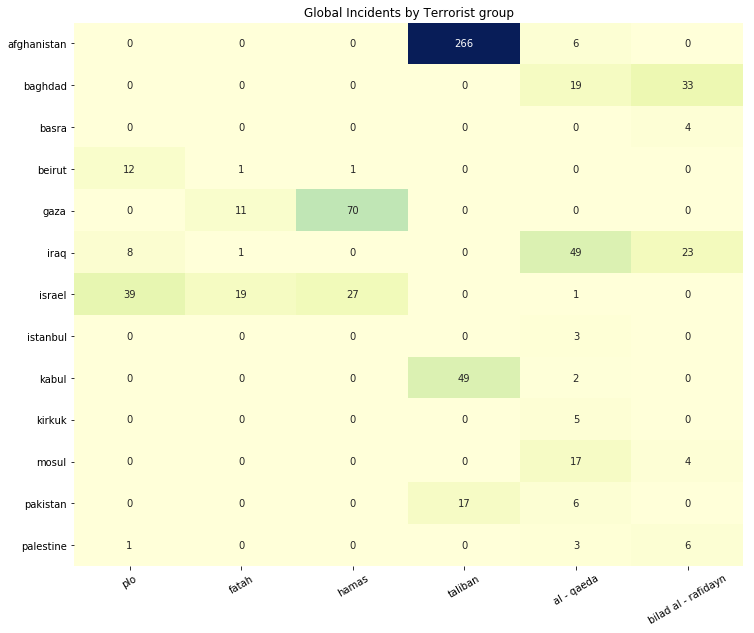

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
hmap = sns.heatmap(location_entity_df, annot=True, fmt='d', cmap='YlGnBu', cbar=False)

# 添加信息
plt.title('Global Incidents by Terrorist group')
plt.xticks(rotation=30)
plt.show()